In [1]:
!pip install prophet

In [2]:
import pandas as pd

In [3]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
df_amzn=pd.read_csv(r"C:\Users\School\Desktop\Datasets\AMZN.csv")

In [5]:
df_amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [6]:
df_amzn.columns = map(str.lower, df_amzn.columns)

In [7]:
df_amzn.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

In [8]:
df_amzn.drop(['open', 'high', 'low','adj close', 'volume'], inplace=True, axis=1)

In [9]:
df_amzn.head(2)

,date,close
0,1997-05-15,1.958333
1,1997-05-16,1.729167


In [10]:
df_amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5655 entries, 0 to 5654
Data columns (total 2 columns):
date     5655 non-null object
close    5655 non-null float64
dtypes: float64(1), object(1)
memory usage: 88.4+ KB


In [11]:
df_amzn.sort_values(['date'],ascending=True).head(2)

,date,close
0,1997-05-15,1.958333
1,1997-05-16,1.729167


In [12]:
df_amzn['date']=pd.to_datetime(df_amzn['date'], errors='coerce')
# dfc['date'] = pd.to_datetime(dfc['date'], errors='coerce')

In [13]:
df_amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5655 entries, 0 to 5654
Data columns (total 2 columns):
date     5655 non-null datetime64[ns]
close    5655 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 88.4 KB


In [14]:
m = Prophet()

In [15]:
df_amzn.columns = ['ds', 'y']
# m.fit(df_amzn)

In [16]:
df_amzn.columns

Index(['ds', 'y'], dtype='object')

In [17]:
df_amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5655 entries, 0 to 5654
Data columns (total 2 columns):
ds    5655 non-null datetime64[ns]
y     5655 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 88.4 KB


In [18]:
m.fit(df_amzn)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=365)

In [25]:
df_amzn.shape

(5655, 2)

In [26]:
future.shape

(6020, 1)

In [20]:
future.tail()

,ds
6015,2020-10-27
6016,2020-10-28
6017,2020-10-29
6018,2020-10-30
6019,2020-10-31


In [21]:
forecast = m.predict(future)

In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6015,2020-10-27,2328.279162,2239.567986,2413.910011
6016,2020-10-28,2329.073304,2246.863293,2415.757538
6017,2020-10-29,2330.884661,2239.872349,2420.883051
6018,2020-10-30,2331.366594,2243.887711,2422.211615
6019,2020-10-31,2342.415606,2251.335899,2433.192574


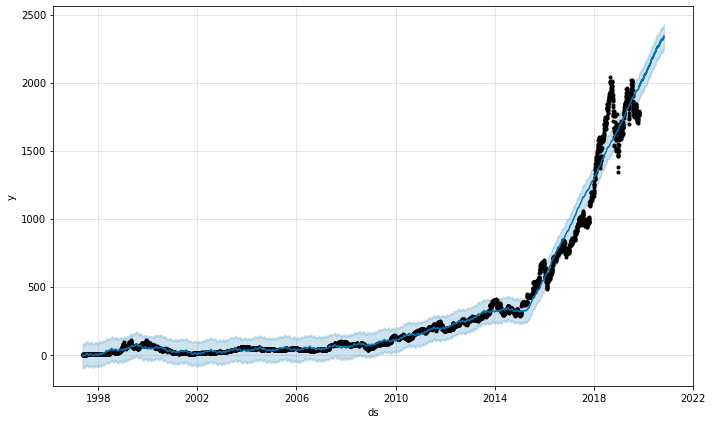

In [23]:
fig1 = m.plot(forecast)